In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Set random seed for reproducibility
np.random.seed(42)

# Create a sample dataset of 30 students with their heights
data = pd.DataFrame({
    'student_id': range(1, 31),
    'height': np.random.normal(170, 10, 30)  # Mean 170 cm, std dev 10 cm
})

# print("Original", data.head())
# Function to perform bootstrap resampling
def bootstrap_mean(data, num_bootstrap_samples=40):
    bootstrap_means = []
    for _ in range(num_bootstrap_samples):
        resample = data['height'].sample(n=len(data), replace=True)
        # print("Resample ", resample.head())
        bootstrap_means.append(resample.mean())
    return pd.Series(bootstrap_means)

# Perform bootstrap resampling
bootstrap_results = bootstrap_mean(data)
print("Bootstrap results", bootstrap_results.head(), len(bootstrap_results))

# Calculate statistics
original_mean = data['height'].mean()
bootstrap_mean = bootstrap_results.mean()
bootstrap_std = bootstrap_results.std()

# Print results
print(f"Original sample mean: {original_mean:.2f} cm")
print(f"Bootstrap mean: {bootstrap_mean:.2f} cm")
print(f"Bootstrap standard error: {bootstrap_std:.2f} cm")

Bootstrap results 0    169.813400
1    168.220565
2    170.443450
3    167.196405
4    170.470940
dtype: float64 40
Original sample mean: 168.12 cm
Bootstrap mean: 168.35 cm
Bootstrap standard error: 1.77 cm


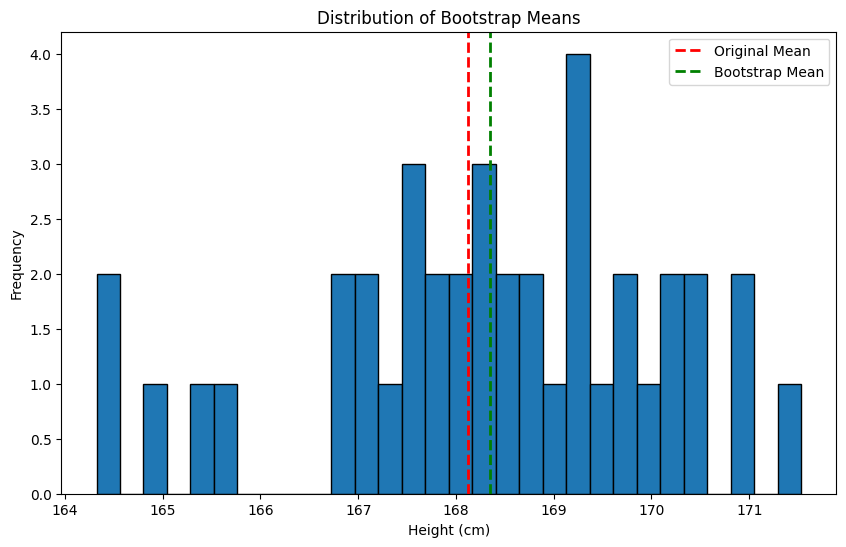

In [12]:
# Plot histogram of bootstrap results
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_results, bins=30, edgecolor='black')
plt.axvline(original_mean, color='red', linestyle='dashed', linewidth=2, label='Original Mean')
plt.axvline(bootstrap_mean, color='green', linestyle='dashed', linewidth=2, label='Bootstrap Mean')
plt.title('Distribution of Bootstrap Means')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.legend()
plt.show()